In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plot
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
batch_size = 32
X_dim = 784
z_dim = 10
y_dim = 10
h_dim = 128
epsilon = 1e-10
d_steps = 3

In [3]:
mnist = input_data.read_data_sets('../../MNIST_data', one_hot=True)

Extracting ../../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
def plot_images(samples):
    fig = plot.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(4, 4)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plot.subplot(gs[i])
        plot.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        plot.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig

In [5]:
def xavier_init(size):
    input_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(input_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)

In [6]:
X = tf.placeholder(tf.float32, shape=[None, X_dim])
y = tf.placeholder(tf.float32, shape=[None, y_dim])

D_W1 = tf.Variable(xavier_init([X_dim, h_dim]))
D_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

D_W_disc = tf.Variable(xavier_init([h_dim, 1]))
D_b_disc = tf.Variable(tf.zeros(shape=[1]))

D_W_classifier = tf.Variable(xavier_init([h_dim, y_dim]))
D_b_classifier = tf.Variable(tf.zeros(shape=[y_dim]))

theta_D = [D_W1, D_W_disc, D_W_classifier, D_b1, D_b_disc, D_b_classifier]


z = tf.placeholder(tf.float32, shape=[None, z_dim])

G_W1 = tf.Variable(xavier_init([z_dim + y_dim, h_dim]))
G_b1 = tf.Variable(tf.zeros(shape=[h_dim]))
G_W2 = tf.Variable(xavier_init([h_dim, X_dim]))
G_b2 = tf.Variable(tf.zeros(shape=[X_dim]))

theta_G = [G_W1, G_W2, G_b1, G_b2]

In [7]:
def get_sample_z(size):
    return np.random.uniform(-1., 1., size=size)

In [8]:
def generator(z, c):
    inp = tf.concat(axis=1, values=[z, c])
    G_h1 = tf.nn.relu(tf.matmul(inp, G_W1) + G_b1)
    G_out = tf.nn.sigmoid(tf.matmul(G_h1, G_W2) + G_b2)
    return G_out

In [9]:
def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_out = tf.nn.sigmoid(tf.matmul(D_h1, D_W_disc) + D_b_disc)
    D_class = tf.matmul(D_h1, D_W_classifier) + D_b_classifier
    return D_out, D_class

In [10]:
generator_sample = generator(z, y)
discriminator_real, classifier_real = discriminator(X)
discriminator_fake, classifier_fake = discriminator(generator_sample)

In [11]:
classifier_loss = -tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=classifier_real, labels=y)) - \
            tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=classifier_fake, labels=y))
disc_loss = tf.reduce_mean(tf.log(discriminator_real + epsilon) + tf.log(1. - discriminator_fake + epsilon))
d_loss = -(classifier_loss + disc_loss)
gen_loss = tf.reduce_mean(tf.log(discriminator_fake + epsilon))
g_loss = -(gen_loss + classifier_loss)

In [12]:
d_step = (tf.train.AdamOptimizer(learning_rate=1e-3).minimize(d_loss, var_list=theta_D))
g_step = (tf.train.AdamOptimizer(learning_rate=1e-3).minimize(g_loss, var_list=theta_G))

In [13]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

Iteration: 0 - Discriminator Loss: 6.299, Generator Loss: 6.806
val: 5


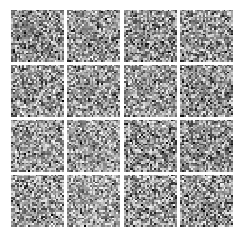

Iteration: 100 - Discriminator Loss: 2.574, Generator Loss: 5.989
Iteration: 200 - Discriminator Loss: 1.981, Generator Loss: 4.586
Iteration: 300 - Discriminator Loss: 1.341, Generator Loss: 5.409
Iteration: 400 - Discriminator Loss: 0.6828, Generator Loss: 4.87
Iteration: 500 - Discriminator Loss: 0.4558, Generator Loss: 5.803
Iteration: 600 - Discriminator Loss: 0.739, Generator Loss: 5.645
Iteration: 700 - Discriminator Loss: 0.4319, Generator Loss: 5.814
Iteration: 800 - Discriminator Loss: 0.5363, Generator Loss: 6.971
Iteration: 900 - Discriminator Loss: 0.1722, Generator Loss: 6.891
Iteration: 1000 - Discriminator Loss: 0.4172, Generator Loss: 5.96
val: 4


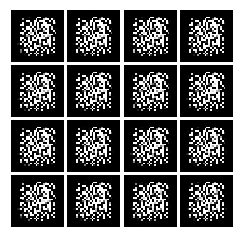

Iteration: 1100 - Discriminator Loss: 0.5429, Generator Loss: 6.115
Iteration: 1200 - Discriminator Loss: 0.4303, Generator Loss: 5.175
Iteration: 1300 - Discriminator Loss: 0.1918, Generator Loss: 6.204
Iteration: 1400 - Discriminator Loss: 0.1419, Generator Loss: 8.336
Iteration: 1500 - Discriminator Loss: 0.2595, Generator Loss: 6.347
Iteration: 1600 - Discriminator Loss: 0.2459, Generator Loss: 4.447
Iteration: 1700 - Discriminator Loss: 0.2647, Generator Loss: 3.931
Iteration: 1800 - Discriminator Loss: 0.5065, Generator Loss: 4.661
Iteration: 1900 - Discriminator Loss: 0.3547, Generator Loss: 5.673
Iteration: 2000 - Discriminator Loss: 0.4638, Generator Loss: 7.555
val: 7


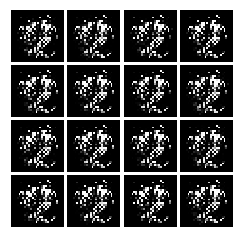

Iteration: 2100 - Discriminator Loss: 0.4507, Generator Loss: 6.492
Iteration: 2200 - Discriminator Loss: 0.1347, Generator Loss: 5.629
Iteration: 2300 - Discriminator Loss: 0.1311, Generator Loss: 4.984
Iteration: 2400 - Discriminator Loss: 0.2705, Generator Loss: 6.519
Iteration: 2500 - Discriminator Loss: 0.1362, Generator Loss: 4.356
Iteration: 2600 - Discriminator Loss: 0.2169, Generator Loss: 4.101
Iteration: 2700 - Discriminator Loss: 0.4424, Generator Loss: 4.393
Iteration: 2800 - Discriminator Loss: 0.3554, Generator Loss: 5.228
Iteration: 2900 - Discriminator Loss: 0.5179, Generator Loss: 5.967
Iteration: 3000 - Discriminator Loss: 0.1546, Generator Loss: 5.675
val: 6


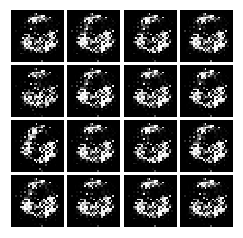

Iteration: 3100 - Discriminator Loss: 0.2222, Generator Loss: 4.862
Iteration: 3200 - Discriminator Loss: 0.3229, Generator Loss: 4.235
Iteration: 3300 - Discriminator Loss: 0.194, Generator Loss: 4.252
Iteration: 3400 - Discriminator Loss: 0.3787, Generator Loss: 5.012
Iteration: 3500 - Discriminator Loss: 0.2407, Generator Loss: 4.55
Iteration: 3600 - Discriminator Loss: 0.2667, Generator Loss: 5.217
Iteration: 3700 - Discriminator Loss: 0.1208, Generator Loss: 4.514
Iteration: 3800 - Discriminator Loss: 0.2889, Generator Loss: 4.482
Iteration: 3900 - Discriminator Loss: 0.3278, Generator Loss: 4.779
Iteration: 4000 - Discriminator Loss: 0.1484, Generator Loss: 5.312
val: 9


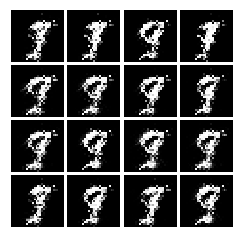

Iteration: 4100 - Discriminator Loss: 0.3247, Generator Loss: 4.694
Iteration: 4200 - Discriminator Loss: 0.1867, Generator Loss: 4.828
Iteration: 4300 - Discriminator Loss: 0.4903, Generator Loss: 5.82
Iteration: 4400 - Discriminator Loss: 0.2803, Generator Loss: 5.51
Iteration: 4500 - Discriminator Loss: 0.3517, Generator Loss: 4.749
Iteration: 4600 - Discriminator Loss: 0.1806, Generator Loss: 4.394
Iteration: 4700 - Discriminator Loss: 0.2524, Generator Loss: 4.768
Iteration: 4800 - Discriminator Loss: 0.2357, Generator Loss: 5.344
Iteration: 4900 - Discriminator Loss: 0.295, Generator Loss: 4.785
Iteration: 5000 - Discriminator Loss: 0.275, Generator Loss: 4.483
val: 8


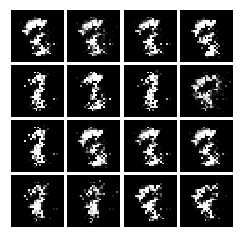

Iteration: 5100 - Discriminator Loss: 0.5041, Generator Loss: 3.68
Iteration: 5200 - Discriminator Loss: 0.5089, Generator Loss: 3.757
Iteration: 5300 - Discriminator Loss: 0.3632, Generator Loss: 3.657
Iteration: 5400 - Discriminator Loss: 0.6791, Generator Loss: 4.234
Iteration: 5500 - Discriminator Loss: 0.1865, Generator Loss: 4.582
Iteration: 5600 - Discriminator Loss: 0.4355, Generator Loss: 4.203
Iteration: 5700 - Discriminator Loss: 0.1523, Generator Loss: 3.699
Iteration: 5800 - Discriminator Loss: 0.3823, Generator Loss: 4.186
Iteration: 5900 - Discriminator Loss: 0.3864, Generator Loss: 3.354
Iteration: 6000 - Discriminator Loss: 0.1409, Generator Loss: 4.553
val: 9


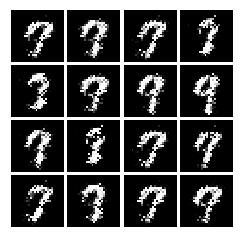

Iteration: 6100 - Discriminator Loss: 0.4362, Generator Loss: 4.363
Iteration: 6200 - Discriminator Loss: 0.2953, Generator Loss: 5.303
Iteration: 6300 - Discriminator Loss: 0.2058, Generator Loss: 4.209
Iteration: 6400 - Discriminator Loss: 0.1214, Generator Loss: 5.028
Iteration: 6500 - Discriminator Loss: 0.2576, Generator Loss: 4.544
Iteration: 6600 - Discriminator Loss: 0.7717, Generator Loss: 4.996
Iteration: 6700 - Discriminator Loss: 0.5195, Generator Loss: 4.728
Iteration: 6800 - Discriminator Loss: 0.3978, Generator Loss: 6.155
Iteration: 6900 - Discriminator Loss: 0.4747, Generator Loss: 3.621
Iteration: 7000 - Discriminator Loss: 0.4402, Generator Loss: 4.481
val: 6


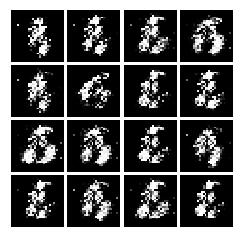

Iteration: 7100 - Discriminator Loss: 0.3004, Generator Loss: 6.263
Iteration: 7200 - Discriminator Loss: 0.7169, Generator Loss: 4.992
Iteration: 7300 - Discriminator Loss: 0.5946, Generator Loss: 4.689
Iteration: 7400 - Discriminator Loss: 0.7245, Generator Loss: 4.385
Iteration: 7500 - Discriminator Loss: 0.5296, Generator Loss: 4.114
Iteration: 7600 - Discriminator Loss: 0.5346, Generator Loss: 4.05
Iteration: 7700 - Discriminator Loss: 0.478, Generator Loss: 4.16
Iteration: 7800 - Discriminator Loss: 0.3487, Generator Loss: 3.999
Iteration: 7900 - Discriminator Loss: 0.5681, Generator Loss: 4.439
Iteration: 8000 - Discriminator Loss: 0.5495, Generator Loss: 4.043
val: 3


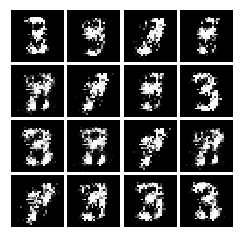

Iteration: 8100 - Discriminator Loss: 0.3328, Generator Loss: 5.637
Iteration: 8200 - Discriminator Loss: 0.669, Generator Loss: 4.026
Iteration: 8300 - Discriminator Loss: 0.5821, Generator Loss: 5.559
Iteration: 8400 - Discriminator Loss: 0.4732, Generator Loss: 3.114
Iteration: 8500 - Discriminator Loss: 0.3452, Generator Loss: 3.865
Iteration: 8600 - Discriminator Loss: 0.4578, Generator Loss: 4.016
Iteration: 8700 - Discriminator Loss: 0.2517, Generator Loss: 4.412
Iteration: 8800 - Discriminator Loss: 0.7138, Generator Loss: 3.685
Iteration: 8900 - Discriminator Loss: 0.2995, Generator Loss: 4.637
Iteration: 9000 - Discriminator Loss: 0.5793, Generator Loss: 4.09
val: 3


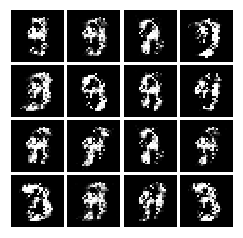

Iteration: 9100 - Discriminator Loss: 0.263, Generator Loss: 4.154
Iteration: 9200 - Discriminator Loss: 0.4189, Generator Loss: 4.357
Iteration: 9300 - Discriminator Loss: 0.4493, Generator Loss: 3.668
Iteration: 9400 - Discriminator Loss: 0.345, Generator Loss: 4.52
Iteration: 9500 - Discriminator Loss: 0.6277, Generator Loss: 4.811
Iteration: 9600 - Discriminator Loss: 0.5337, Generator Loss: 4.509
Iteration: 9700 - Discriminator Loss: 0.2868, Generator Loss: 4.096
Iteration: 9800 - Discriminator Loss: 0.3211, Generator Loss: 4.222
Iteration: 9900 - Discriminator Loss: 0.2802, Generator Loss: 4.151
Iteration: 10000 - Discriminator Loss: 0.5526, Generator Loss: 4.279
val: 2


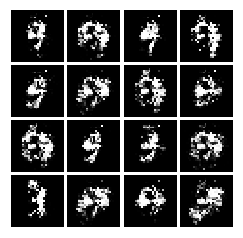

Iteration: 10100 - Discriminator Loss: 0.5166, Generator Loss: 3.757
Iteration: 10200 - Discriminator Loss: 0.5302, Generator Loss: 4.091
Iteration: 10300 - Discriminator Loss: 1.029, Generator Loss: 5.397
Iteration: 10400 - Discriminator Loss: 0.5678, Generator Loss: 2.685
Iteration: 10500 - Discriminator Loss: 0.3849, Generator Loss: 4.027
Iteration: 10600 - Discriminator Loss: 0.2854, Generator Loss: 3.977
Iteration: 10700 - Discriminator Loss: 0.5362, Generator Loss: 4.478
Iteration: 10800 - Discriminator Loss: 0.6228, Generator Loss: 4.338
Iteration: 10900 - Discriminator Loss: 0.3675, Generator Loss: 3.387
Iteration: 11000 - Discriminator Loss: 0.5202, Generator Loss: 4.493
val: 2


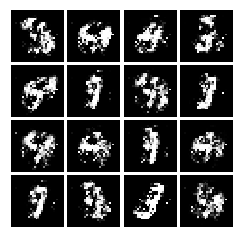

Iteration: 11100 - Discriminator Loss: 0.5193, Generator Loss: 3.517
Iteration: 11200 - Discriminator Loss: 0.6549, Generator Loss: 3.828
Iteration: 11300 - Discriminator Loss: 0.8336, Generator Loss: 4.631
Iteration: 11400 - Discriminator Loss: 0.6629, Generator Loss: 3.319
Iteration: 11500 - Discriminator Loss: 0.5791, Generator Loss: 3.312
Iteration: 11600 - Discriminator Loss: 0.6143, Generator Loss: 4.332
Iteration: 11700 - Discriminator Loss: 0.6883, Generator Loss: 3.118
Iteration: 11800 - Discriminator Loss: 0.4538, Generator Loss: 3.942
Iteration: 11900 - Discriminator Loss: 0.4141, Generator Loss: 3.748
Iteration: 12000 - Discriminator Loss: 0.6956, Generator Loss: 3.853
val: 2


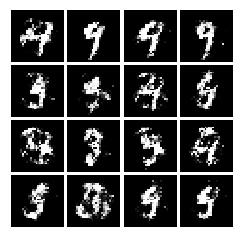

Iteration: 12100 - Discriminator Loss: 0.72, Generator Loss: 3.425
Iteration: 12200 - Discriminator Loss: 0.4245, Generator Loss: 3.558
Iteration: 12300 - Discriminator Loss: 0.6965, Generator Loss: 3.526
Iteration: 12400 - Discriminator Loss: 0.4816, Generator Loss: 3.06
Iteration: 12500 - Discriminator Loss: 0.8765, Generator Loss: 2.927
Iteration: 12600 - Discriminator Loss: 0.3219, Generator Loss: 4.359
Iteration: 12700 - Discriminator Loss: 0.4231, Generator Loss: 3.511
Iteration: 12800 - Discriminator Loss: 0.5028, Generator Loss: 3.864
Iteration: 12900 - Discriminator Loss: 0.474, Generator Loss: 3.361
Iteration: 13000 - Discriminator Loss: 0.6064, Generator Loss: 3.885
val: 1


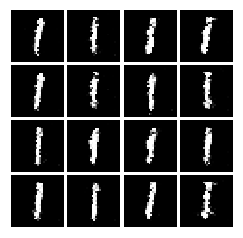

Iteration: 13100 - Discriminator Loss: 0.5705, Generator Loss: 3.452
Iteration: 13200 - Discriminator Loss: 0.2266, Generator Loss: 3.486
Iteration: 13300 - Discriminator Loss: 1.154, Generator Loss: 4.509
Iteration: 13400 - Discriminator Loss: 0.696, Generator Loss: 3.091
Iteration: 13500 - Discriminator Loss: 0.5954, Generator Loss: 3.224
Iteration: 13600 - Discriminator Loss: 0.7639, Generator Loss: 3.817
Iteration: 13700 - Discriminator Loss: 0.9242, Generator Loss: 3.257
Iteration: 13800 - Discriminator Loss: 0.487, Generator Loss: 3.727
Iteration: 13900 - Discriminator Loss: 0.7317, Generator Loss: 3.188
Iteration: 14000 - Discriminator Loss: 0.9099, Generator Loss: 2.772
val: 3


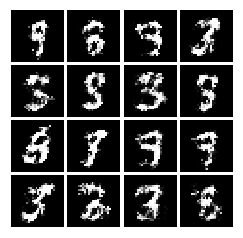

Iteration: 14100 - Discriminator Loss: 0.8122, Generator Loss: 3.39
Iteration: 14200 - Discriminator Loss: 0.6602, Generator Loss: 3.99
Iteration: 14300 - Discriminator Loss: 0.5381, Generator Loss: 2.727
Iteration: 14400 - Discriminator Loss: 0.7269, Generator Loss: 3.55
Iteration: 14500 - Discriminator Loss: 1.045, Generator Loss: 3.534
Iteration: 14600 - Discriminator Loss: 0.588, Generator Loss: 3.002
Iteration: 14700 - Discriminator Loss: 0.7265, Generator Loss: 3.319
Iteration: 14800 - Discriminator Loss: 0.8777, Generator Loss: 3.003
Iteration: 14900 - Discriminator Loss: 0.5146, Generator Loss: 3.331
Iteration: 15000 - Discriminator Loss: 0.4345, Generator Loss: 4.139
val: 1


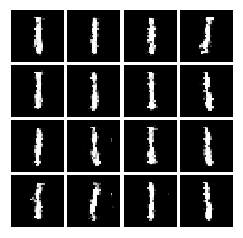

Iteration: 15100 - Discriminator Loss: 0.4951, Generator Loss: 3.45
Iteration: 15200 - Discriminator Loss: 0.5394, Generator Loss: 2.776
Iteration: 15300 - Discriminator Loss: 0.6705, Generator Loss: 3.793
Iteration: 15400 - Discriminator Loss: 0.7937, Generator Loss: 2.299
Iteration: 15500 - Discriminator Loss: 0.9332, Generator Loss: 3.208
Iteration: 15600 - Discriminator Loss: 0.636, Generator Loss: 3.315
Iteration: 15700 - Discriminator Loss: 0.5924, Generator Loss: 3.433
Iteration: 15800 - Discriminator Loss: 0.62, Generator Loss: 3.805
Iteration: 15900 - Discriminator Loss: 0.4394, Generator Loss: 3.817
Iteration: 16000 - Discriminator Loss: 0.3028, Generator Loss: 3.063
val: 7


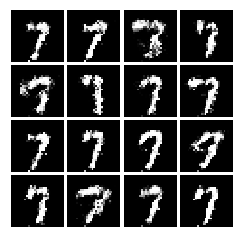

Iteration: 16100 - Discriminator Loss: 0.4555, Generator Loss: 3.424
Iteration: 16200 - Discriminator Loss: 0.6483, Generator Loss: 3.506
Iteration: 16300 - Discriminator Loss: 1.038, Generator Loss: 3.763
Iteration: 16400 - Discriminator Loss: 0.4225, Generator Loss: 3.201
Iteration: 16500 - Discriminator Loss: 0.7265, Generator Loss: 3.461
Iteration: 16600 - Discriminator Loss: 1.286, Generator Loss: 3.176
Iteration: 16700 - Discriminator Loss: 0.7849, Generator Loss: 2.886
Iteration: 16800 - Discriminator Loss: 0.5013, Generator Loss: 3.022
Iteration: 16900 - Discriminator Loss: 0.6378, Generator Loss: 3.641
Iteration: 17000 - Discriminator Loss: 0.9011, Generator Loss: 2.783
val: 8


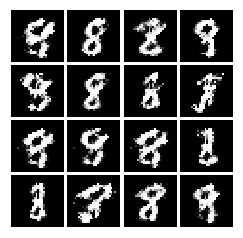

Iteration: 17100 - Discriminator Loss: 0.4093, Generator Loss: 2.9
Iteration: 17200 - Discriminator Loss: 0.7642, Generator Loss: 2.903
Iteration: 17300 - Discriminator Loss: 0.7277, Generator Loss: 3.777
Iteration: 17400 - Discriminator Loss: 0.6578, Generator Loss: 2.585
Iteration: 17500 - Discriminator Loss: 0.9471, Generator Loss: 3.638
Iteration: 17600 - Discriminator Loss: 0.9536, Generator Loss: 2.534
Iteration: 17700 - Discriminator Loss: 0.9976, Generator Loss: 2.623
Iteration: 17800 - Discriminator Loss: 0.5736, Generator Loss: 3.143
Iteration: 17900 - Discriminator Loss: 0.601, Generator Loss: 2.641
Iteration: 18000 - Discriminator Loss: 0.4896, Generator Loss: 2.901
val: 9


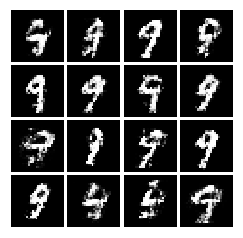

Iteration: 18100 - Discriminator Loss: 0.7841, Generator Loss: 2.242
Iteration: 18200 - Discriminator Loss: 1.092, Generator Loss: 2.772
Iteration: 18300 - Discriminator Loss: 1.056, Generator Loss: 3.061
Iteration: 18400 - Discriminator Loss: 0.3475, Generator Loss: 3.172
Iteration: 18500 - Discriminator Loss: 0.6668, Generator Loss: 3.169
Iteration: 18600 - Discriminator Loss: 0.6643, Generator Loss: 2.808
Iteration: 18700 - Discriminator Loss: 0.6323, Generator Loss: 2.426
Iteration: 18800 - Discriminator Loss: 1.055, Generator Loss: 2.779
Iteration: 18900 - Discriminator Loss: 0.8336, Generator Loss: 1.95
Iteration: 19000 - Discriminator Loss: 1.293, Generator Loss: 3.455
val: 3


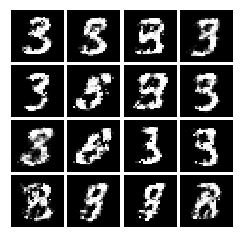

Iteration: 19100 - Discriminator Loss: 1.109, Generator Loss: 2.754
Iteration: 19200 - Discriminator Loss: 1.263, Generator Loss: 2.991
Iteration: 19300 - Discriminator Loss: 1.194, Generator Loss: 2.529
Iteration: 19400 - Discriminator Loss: 0.6732, Generator Loss: 3.505
Iteration: 19500 - Discriminator Loss: 0.5171, Generator Loss: 2.809
Iteration: 19600 - Discriminator Loss: 0.695, Generator Loss: 2.473
Iteration: 19700 - Discriminator Loss: 0.8012, Generator Loss: 2.749
Iteration: 19800 - Discriminator Loss: 0.6994, Generator Loss: 2.639
Iteration: 19900 - Discriminator Loss: 0.5721, Generator Loss: 2.983
Iteration: 20000 - Discriminator Loss: 0.5121, Generator Loss: 2.888
val: 4


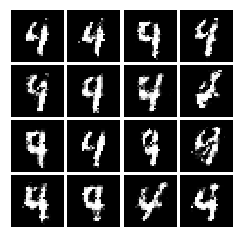

Iteration: 20100 - Discriminator Loss: 0.463, Generator Loss: 2.668
Iteration: 20200 - Discriminator Loss: 0.768, Generator Loss: 2.673
Iteration: 20300 - Discriminator Loss: 0.6824, Generator Loss: 2.804
Iteration: 20400 - Discriminator Loss: 0.5795, Generator Loss: 2.669
Iteration: 20500 - Discriminator Loss: 1.148, Generator Loss: 3.492
Iteration: 20600 - Discriminator Loss: 0.6416, Generator Loss: 3.289
Iteration: 20700 - Discriminator Loss: 1.286, Generator Loss: 2.724
Iteration: 20800 - Discriminator Loss: 0.554, Generator Loss: 3.102
Iteration: 20900 - Discriminator Loss: 0.7098, Generator Loss: 2.783
Iteration: 21000 - Discriminator Loss: 0.5023, Generator Loss: 3.537
val: 5


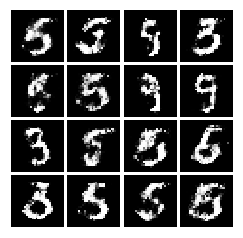

Iteration: 21100 - Discriminator Loss: 0.9644, Generator Loss: 3.002
Iteration: 21200 - Discriminator Loss: 1.065, Generator Loss: 2.472
Iteration: 21300 - Discriminator Loss: 0.6958, Generator Loss: 2.361
Iteration: 21400 - Discriminator Loss: 1.259, Generator Loss: 2.305
Iteration: 21500 - Discriminator Loss: 1.021, Generator Loss: 2.512
Iteration: 21600 - Discriminator Loss: 1.052, Generator Loss: 2.136
Iteration: 21700 - Discriminator Loss: 0.7186, Generator Loss: 2.701
Iteration: 21800 - Discriminator Loss: 0.7, Generator Loss: 2.028
Iteration: 21900 - Discriminator Loss: 0.8895, Generator Loss: 2.565
Iteration: 22000 - Discriminator Loss: 0.3892, Generator Loss: 2.604
val: 9


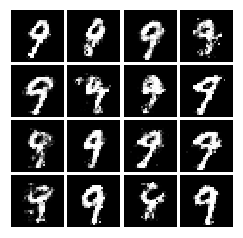

Iteration: 22100 - Discriminator Loss: 0.9828, Generator Loss: 2.635
Iteration: 22200 - Discriminator Loss: 0.4869, Generator Loss: 2.796
Iteration: 22300 - Discriminator Loss: 0.8665, Generator Loss: 2.428
Iteration: 22400 - Discriminator Loss: 0.8654, Generator Loss: 2.309
Iteration: 22500 - Discriminator Loss: 0.9742, Generator Loss: 2.435
Iteration: 22600 - Discriminator Loss: 0.8401, Generator Loss: 1.992
Iteration: 22700 - Discriminator Loss: 1.192, Generator Loss: 2.335
Iteration: 22800 - Discriminator Loss: 0.7847, Generator Loss: 2.904
Iteration: 22900 - Discriminator Loss: 0.7029, Generator Loss: 3.007
Iteration: 23000 - Discriminator Loss: 0.8616, Generator Loss: 2.466
val: 4


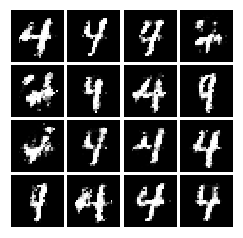

Iteration: 23100 - Discriminator Loss: 0.6982, Generator Loss: 2.139
Iteration: 23200 - Discriminator Loss: 0.4959, Generator Loss: 2.329
Iteration: 23300 - Discriminator Loss: 0.8125, Generator Loss: 2.546
Iteration: 23400 - Discriminator Loss: 1.372, Generator Loss: 2.599
Iteration: 23500 - Discriminator Loss: 0.9279, Generator Loss: 2.007
Iteration: 23600 - Discriminator Loss: 0.9848, Generator Loss: 2.191
Iteration: 23700 - Discriminator Loss: 0.9811, Generator Loss: 2.481
Iteration: 23800 - Discriminator Loss: 0.836, Generator Loss: 1.921
Iteration: 23900 - Discriminator Loss: 0.8449, Generator Loss: 2.672
Iteration: 24000 - Discriminator Loss: 0.4656, Generator Loss: 2.614
val: 8


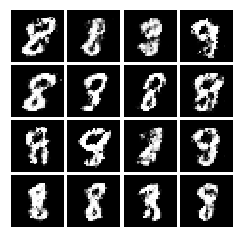

Iteration: 24100 - Discriminator Loss: 0.8754, Generator Loss: 2.634
Iteration: 24200 - Discriminator Loss: 0.7593, Generator Loss: 2.372
Iteration: 24300 - Discriminator Loss: 1.359, Generator Loss: 2.942
Iteration: 24400 - Discriminator Loss: 0.6077, Generator Loss: 2.22
Iteration: 24500 - Discriminator Loss: 0.5046, Generator Loss: 2.437
Iteration: 24600 - Discriminator Loss: 0.6153, Generator Loss: 2.475
Iteration: 24700 - Discriminator Loss: 0.912, Generator Loss: 2.559
Iteration: 24800 - Discriminator Loss: 0.8136, Generator Loss: 1.894
Iteration: 24900 - Discriminator Loss: 0.768, Generator Loss: 2.201
Iteration: 25000 - Discriminator Loss: 1.012, Generator Loss: 2.029
val: 5


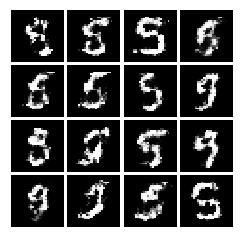

Iteration: 25100 - Discriminator Loss: 1.063, Generator Loss: 2.282
Iteration: 25200 - Discriminator Loss: 0.7325, Generator Loss: 2.455
Iteration: 25300 - Discriminator Loss: 0.9181, Generator Loss: 2.577
Iteration: 25400 - Discriminator Loss: 0.9831, Generator Loss: 2.12
Iteration: 25500 - Discriminator Loss: 0.9574, Generator Loss: 2.894
Iteration: 25600 - Discriminator Loss: 0.671, Generator Loss: 2.762
Iteration: 25700 - Discriminator Loss: 1.033, Generator Loss: 1.826
Iteration: 25800 - Discriminator Loss: 0.7635, Generator Loss: 3.091
Iteration: 25900 - Discriminator Loss: 0.7431, Generator Loss: 2.661
Iteration: 26000 - Discriminator Loss: 0.5914, Generator Loss: 2.982
val: 6


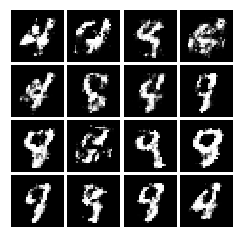

Iteration: 26100 - Discriminator Loss: 1.147, Generator Loss: 2.509
Iteration: 26200 - Discriminator Loss: 0.889, Generator Loss: 2.572
Iteration: 26300 - Discriminator Loss: 0.8432, Generator Loss: 2.095
Iteration: 26400 - Discriminator Loss: 0.6164, Generator Loss: 2.2
Iteration: 26500 - Discriminator Loss: 0.6262, Generator Loss: 2.383
Iteration: 26600 - Discriminator Loss: 1.037, Generator Loss: 2.258
Iteration: 26700 - Discriminator Loss: 0.7596, Generator Loss: 2.927
Iteration: 26800 - Discriminator Loss: 1.056, Generator Loss: 2.664
Iteration: 26900 - Discriminator Loss: 0.806, Generator Loss: 2.842
Iteration: 27000 - Discriminator Loss: 0.9508, Generator Loss: 3.322
val: 5


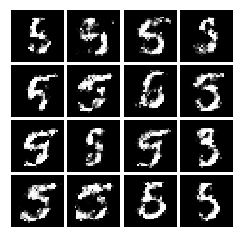

Iteration: 27100 - Discriminator Loss: 1.538, Generator Loss: 2.482
Iteration: 27200 - Discriminator Loss: 0.7671, Generator Loss: 2.21
Iteration: 27300 - Discriminator Loss: 0.7964, Generator Loss: 1.872
Iteration: 27400 - Discriminator Loss: 0.7644, Generator Loss: 2.076
Iteration: 27500 - Discriminator Loss: 0.4876, Generator Loss: 2.425
Iteration: 27600 - Discriminator Loss: 0.7754, Generator Loss: 2.254
Iteration: 27700 - Discriminator Loss: 0.9952, Generator Loss: 2.496
Iteration: 27800 - Discriminator Loss: 0.6178, Generator Loss: 2.187
Iteration: 27900 - Discriminator Loss: 1.096, Generator Loss: 2.271
Iteration: 28000 - Discriminator Loss: 0.7252, Generator Loss: 2.29
val: 8


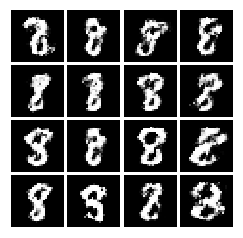

Iteration: 28100 - Discriminator Loss: 0.8032, Generator Loss: 1.893
Iteration: 28200 - Discriminator Loss: 0.6484, Generator Loss: 2.406
Iteration: 28300 - Discriminator Loss: 1.01, Generator Loss: 1.927
Iteration: 28400 - Discriminator Loss: 0.7068, Generator Loss: 2.7
Iteration: 28500 - Discriminator Loss: 1.468, Generator Loss: 2.328
Iteration: 28600 - Discriminator Loss: 0.7698, Generator Loss: 2.214
Iteration: 28700 - Discriminator Loss: 0.6992, Generator Loss: 2.687
Iteration: 28800 - Discriminator Loss: 0.8814, Generator Loss: 2.352
Iteration: 28900 - Discriminator Loss: 1.176, Generator Loss: 2.052
Iteration: 29000 - Discriminator Loss: 0.7535, Generator Loss: 1.996
val: 2


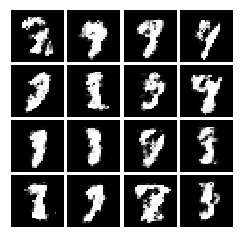

Iteration: 29100 - Discriminator Loss: 0.9094, Generator Loss: 2.143
Iteration: 29200 - Discriminator Loss: 0.8546, Generator Loss: 1.959
Iteration: 29300 - Discriminator Loss: 0.7441, Generator Loss: 2.088
Iteration: 29400 - Discriminator Loss: 0.8827, Generator Loss: 1.948
Iteration: 29500 - Discriminator Loss: 0.5864, Generator Loss: 1.74
Iteration: 29600 - Discriminator Loss: 1.106, Generator Loss: 2.5
Iteration: 29700 - Discriminator Loss: 0.7303, Generator Loss: 2.59
Iteration: 29800 - Discriminator Loss: 0.8448, Generator Loss: 2.428
Iteration: 29900 - Discriminator Loss: 0.8529, Generator Loss: 2.256
Iteration: 30000 - Discriminator Loss: 0.7477, Generator Loss: 2.179
val: 3


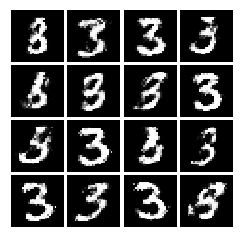

Iteration: 30100 - Discriminator Loss: 0.8009, Generator Loss: 2.172
Iteration: 30200 - Discriminator Loss: 0.5652, Generator Loss: 2.023
Iteration: 30300 - Discriminator Loss: 0.6595, Generator Loss: 2.375
Iteration: 30400 - Discriminator Loss: 0.7528, Generator Loss: 1.877
Iteration: 30500 - Discriminator Loss: 0.9102, Generator Loss: 2.318
Iteration: 30600 - Discriminator Loss: 0.9748, Generator Loss: 1.922
Iteration: 30700 - Discriminator Loss: 1.006, Generator Loss: 2.154
Iteration: 30800 - Discriminator Loss: 1.023, Generator Loss: 2.31
Iteration: 30900 - Discriminator Loss: 0.7133, Generator Loss: 2.43
Iteration: 31000 - Discriminator Loss: 0.715, Generator Loss: 2.342
val: 6


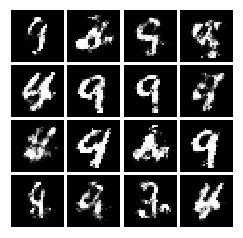

Iteration: 31100 - Discriminator Loss: 1.002, Generator Loss: 2.345
Iteration: 31200 - Discriminator Loss: 0.985, Generator Loss: 1.979
Iteration: 31300 - Discriminator Loss: 0.7912, Generator Loss: 1.991
Iteration: 31400 - Discriminator Loss: 1.308, Generator Loss: 1.782
Iteration: 31500 - Discriminator Loss: 0.8465, Generator Loss: 2.474
Iteration: 31600 - Discriminator Loss: 0.7536, Generator Loss: 2.659
Iteration: 31700 - Discriminator Loss: 1.05, Generator Loss: 2.34
Iteration: 31800 - Discriminator Loss: 0.8813, Generator Loss: 2.787
Iteration: 31900 - Discriminator Loss: 1.142, Generator Loss: 2.302
Iteration: 32000 - Discriminator Loss: 0.914, Generator Loss: 1.807
val: 2


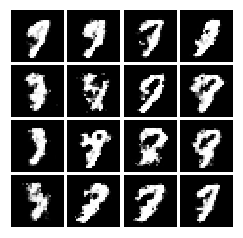

Iteration: 32100 - Discriminator Loss: 1.083, Generator Loss: 1.799
Iteration: 32200 - Discriminator Loss: 0.5401, Generator Loss: 2.126
Iteration: 32300 - Discriminator Loss: 0.772, Generator Loss: 2.479
Iteration: 32400 - Discriminator Loss: 0.6766, Generator Loss: 2.028
Iteration: 32500 - Discriminator Loss: 0.5751, Generator Loss: 2.138
Iteration: 32600 - Discriminator Loss: 0.8797, Generator Loss: 1.83
Iteration: 32700 - Discriminator Loss: 0.9884, Generator Loss: 1.469
Iteration: 32800 - Discriminator Loss: 0.6664, Generator Loss: 2.079
Iteration: 32900 - Discriminator Loss: 0.5458, Generator Loss: 2.244
Iteration: 33000 - Discriminator Loss: 0.8938, Generator Loss: 2.553
val: 6


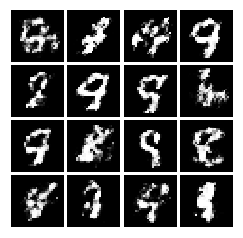

Iteration: 33100 - Discriminator Loss: 0.9902, Generator Loss: 1.586
Iteration: 33200 - Discriminator Loss: 0.8108, Generator Loss: 2.532
Iteration: 33300 - Discriminator Loss: 0.8769, Generator Loss: 2.019
Iteration: 33400 - Discriminator Loss: 0.5889, Generator Loss: 2.223
Iteration: 33500 - Discriminator Loss: 0.8426, Generator Loss: 1.741
Iteration: 33600 - Discriminator Loss: 0.7358, Generator Loss: 2.129
Iteration: 33700 - Discriminator Loss: 0.8847, Generator Loss: 1.811
Iteration: 33800 - Discriminator Loss: 0.6926, Generator Loss: 2.686
Iteration: 33900 - Discriminator Loss: 0.5952, Generator Loss: 2.107
Iteration: 34000 - Discriminator Loss: 0.7054, Generator Loss: 2.669
val: 5


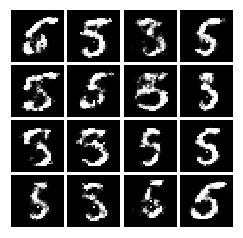

Iteration: 34100 - Discriminator Loss: 0.9909, Generator Loss: 2.93
Iteration: 34200 - Discriminator Loss: 0.8469, Generator Loss: 1.889
Iteration: 34300 - Discriminator Loss: 1.032, Generator Loss: 1.989
Iteration: 34400 - Discriminator Loss: 0.6448, Generator Loss: 1.993
Iteration: 34500 - Discriminator Loss: 0.7872, Generator Loss: 2.314
Iteration: 34600 - Discriminator Loss: 0.8846, Generator Loss: 2.504
Iteration: 34700 - Discriminator Loss: 0.6961, Generator Loss: 2.13
Iteration: 34800 - Discriminator Loss: 1.143, Generator Loss: 2.09
Iteration: 34900 - Discriminator Loss: 0.8052, Generator Loss: 1.983
Iteration: 35000 - Discriminator Loss: 0.5018, Generator Loss: 2.06
val: 0


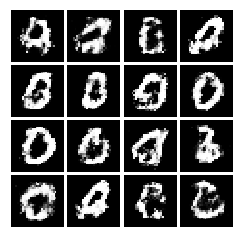

Iteration: 35100 - Discriminator Loss: 0.6962, Generator Loss: 2.283
Iteration: 35200 - Discriminator Loss: 0.8938, Generator Loss: 1.611
Iteration: 35300 - Discriminator Loss: 0.5784, Generator Loss: 2.506
Iteration: 35400 - Discriminator Loss: 0.7703, Generator Loss: 2.002
Iteration: 35500 - Discriminator Loss: 0.987, Generator Loss: 2.083
Iteration: 35600 - Discriminator Loss: 0.9047, Generator Loss: 2.336
Iteration: 35700 - Discriminator Loss: 1.043, Generator Loss: 2.134
Iteration: 35800 - Discriminator Loss: 0.7122, Generator Loss: 1.87
Iteration: 35900 - Discriminator Loss: 1.045, Generator Loss: 2.029
Iteration: 36000 - Discriminator Loss: 0.7468, Generator Loss: 2.058
val: 9


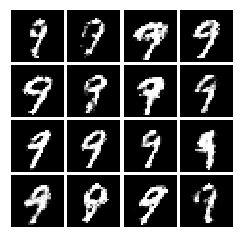

Iteration: 36100 - Discriminator Loss: 0.9653, Generator Loss: 1.973
Iteration: 36200 - Discriminator Loss: 1.043, Generator Loss: 1.897
Iteration: 36300 - Discriminator Loss: 1.021, Generator Loss: 1.8
Iteration: 36400 - Discriminator Loss: 0.9207, Generator Loss: 2.199
Iteration: 36500 - Discriminator Loss: 0.9982, Generator Loss: 2.208
Iteration: 36600 - Discriminator Loss: 0.9351, Generator Loss: 1.83
Iteration: 36700 - Discriminator Loss: 0.7918, Generator Loss: 2.179
Iteration: 36800 - Discriminator Loss: 0.8146, Generator Loss: 2.066
Iteration: 36900 - Discriminator Loss: 1.017, Generator Loss: 2.014
Iteration: 37000 - Discriminator Loss: 1.159, Generator Loss: 2.162
val: 6


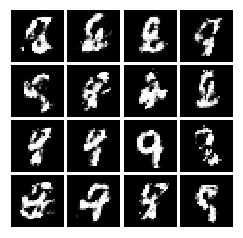

Iteration: 37100 - Discriminator Loss: 0.8653, Generator Loss: 2.112
Iteration: 37200 - Discriminator Loss: 0.7081, Generator Loss: 2.407
Iteration: 37300 - Discriminator Loss: 0.6685, Generator Loss: 1.88
Iteration: 37400 - Discriminator Loss: 1.071, Generator Loss: 1.973
Iteration: 37500 - Discriminator Loss: 0.6883, Generator Loss: 2.046
Iteration: 37600 - Discriminator Loss: 0.9454, Generator Loss: 2.324
Iteration: 37700 - Discriminator Loss: 0.753, Generator Loss: 1.78
Iteration: 37800 - Discriminator Loss: 0.8687, Generator Loss: 1.971
Iteration: 37900 - Discriminator Loss: 0.61, Generator Loss: 2.256
Iteration: 38000 - Discriminator Loss: 0.7294, Generator Loss: 1.863
val: 0


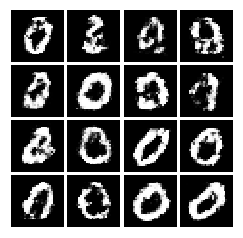

Iteration: 38100 - Discriminator Loss: 0.8786, Generator Loss: 1.865
Iteration: 38200 - Discriminator Loss: 0.8896, Generator Loss: 2.29
Iteration: 38300 - Discriminator Loss: 1.04, Generator Loss: 2.143
Iteration: 38400 - Discriminator Loss: 1.007, Generator Loss: 1.819
Iteration: 38500 - Discriminator Loss: 0.5729, Generator Loss: 2.162
Iteration: 38600 - Discriminator Loss: 0.8458, Generator Loss: 2.336
Iteration: 38700 - Discriminator Loss: 0.8661, Generator Loss: 2.311
Iteration: 38800 - Discriminator Loss: 1.195, Generator Loss: 2.002
Iteration: 38900 - Discriminator Loss: 0.838, Generator Loss: 2.278
Iteration: 39000 - Discriminator Loss: 1.011, Generator Loss: 1.862
val: 1


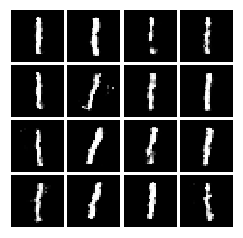

Iteration: 39100 - Discriminator Loss: 1.121, Generator Loss: 1.98
Iteration: 39200 - Discriminator Loss: 0.7834, Generator Loss: 1.923
Iteration: 39300 - Discriminator Loss: 0.9436, Generator Loss: 2.019
Iteration: 39400 - Discriminator Loss: 0.8269, Generator Loss: 2.16
Iteration: 39500 - Discriminator Loss: 0.8655, Generator Loss: 1.78
Iteration: 39600 - Discriminator Loss: 0.9373, Generator Loss: 2.035
Iteration: 39700 - Discriminator Loss: 0.8209, Generator Loss: 1.976
Iteration: 39800 - Discriminator Loss: 0.8598, Generator Loss: 2.357
Iteration: 39900 - Discriminator Loss: 0.6729, Generator Loss: 1.508
Iteration: 40000 - Discriminator Loss: 0.7696, Generator Loss: 2.028
val: 5


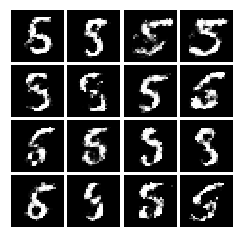

Iteration: 40100 - Discriminator Loss: 0.9138, Generator Loss: 1.684
Iteration: 40200 - Discriminator Loss: 0.9073, Generator Loss: 2.289
Iteration: 40300 - Discriminator Loss: 0.8384, Generator Loss: 2.156
Iteration: 40400 - Discriminator Loss: 1.011, Generator Loss: 1.487
Iteration: 40500 - Discriminator Loss: 1.077, Generator Loss: 2.0
Iteration: 40600 - Discriminator Loss: 1.264, Generator Loss: 2.233
Iteration: 40700 - Discriminator Loss: 0.7569, Generator Loss: 1.936
Iteration: 40800 - Discriminator Loss: 0.7669, Generator Loss: 1.927
Iteration: 40900 - Discriminator Loss: 1.05, Generator Loss: 2.288
Iteration: 41000 - Discriminator Loss: 0.9253, Generator Loss: 1.874
val: 6


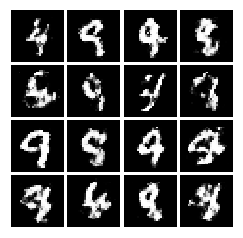

Iteration: 41100 - Discriminator Loss: 0.982, Generator Loss: 2.328
Iteration: 41200 - Discriminator Loss: 1.024, Generator Loss: 2.193
Iteration: 41300 - Discriminator Loss: 0.6336, Generator Loss: 2.334
Iteration: 41400 - Discriminator Loss: 0.6973, Generator Loss: 2.445
Iteration: 41500 - Discriminator Loss: 1.004, Generator Loss: 1.644
Iteration: 41600 - Discriminator Loss: 0.6734, Generator Loss: 2.313
Iteration: 41700 - Discriminator Loss: 0.9771, Generator Loss: 1.671
Iteration: 41800 - Discriminator Loss: 0.9095, Generator Loss: 1.849
Iteration: 41900 - Discriminator Loss: 1.057, Generator Loss: 1.71
Iteration: 42000 - Discriminator Loss: 0.8687, Generator Loss: 1.94
val: 5


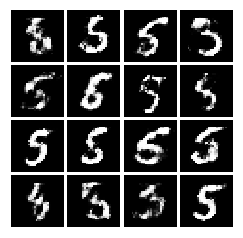

Iteration: 42100 - Discriminator Loss: 0.7566, Generator Loss: 2.224
Iteration: 42200 - Discriminator Loss: 0.9788, Generator Loss: 2.056
Iteration: 42300 - Discriminator Loss: 0.7854, Generator Loss: 2.032
Iteration: 42400 - Discriminator Loss: 0.592, Generator Loss: 2.134
Iteration: 42500 - Discriminator Loss: 0.7942, Generator Loss: 2.642
Iteration: 42600 - Discriminator Loss: 0.7307, Generator Loss: 2.063
Iteration: 42700 - Discriminator Loss: 0.9785, Generator Loss: 1.764
Iteration: 42800 - Discriminator Loss: 1.051, Generator Loss: 2.155
Iteration: 42900 - Discriminator Loss: 0.8479, Generator Loss: 2.139
Iteration: 43000 - Discriminator Loss: 0.705, Generator Loss: 2.011
val: 1


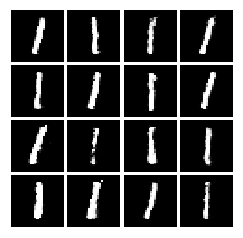

Iteration: 43100 - Discriminator Loss: 0.6985, Generator Loss: 1.91
Iteration: 43200 - Discriminator Loss: 0.9173, Generator Loss: 2.146
Iteration: 43300 - Discriminator Loss: 1.052, Generator Loss: 1.801
Iteration: 43400 - Discriminator Loss: 1.061, Generator Loss: 2.105
Iteration: 43500 - Discriminator Loss: 0.7868, Generator Loss: 2.088
Iteration: 43600 - Discriminator Loss: 0.8502, Generator Loss: 1.741
Iteration: 43700 - Discriminator Loss: 1.04, Generator Loss: 1.97
Iteration: 43800 - Discriminator Loss: 0.7315, Generator Loss: 1.96
Iteration: 43900 - Discriminator Loss: 1.079, Generator Loss: 1.919
Iteration: 44000 - Discriminator Loss: 1.063, Generator Loss: 2.101
val: 1


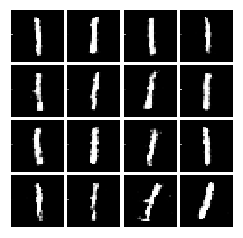

Iteration: 44100 - Discriminator Loss: 0.7207, Generator Loss: 1.866
Iteration: 44200 - Discriminator Loss: 0.9352, Generator Loss: 1.753
Iteration: 44300 - Discriminator Loss: 1.298, Generator Loss: 2.332
Iteration: 44400 - Discriminator Loss: 0.8082, Generator Loss: 2.189
Iteration: 44500 - Discriminator Loss: 0.8688, Generator Loss: 1.895
Iteration: 44600 - Discriminator Loss: 0.6787, Generator Loss: 2.374
Iteration: 44700 - Discriminator Loss: 0.6239, Generator Loss: 2.053
Iteration: 44800 - Discriminator Loss: 0.7403, Generator Loss: 1.958
Iteration: 44900 - Discriminator Loss: 0.7783, Generator Loss: 1.913
Iteration: 45000 - Discriminator Loss: 0.5179, Generator Loss: 2.166
val: 4


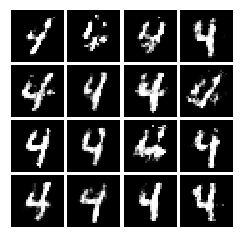

Iteration: 45100 - Discriminator Loss: 0.8223, Generator Loss: 2.369
Iteration: 45200 - Discriminator Loss: 0.8032, Generator Loss: 1.798
Iteration: 45300 - Discriminator Loss: 0.933, Generator Loss: 2.124
Iteration: 45400 - Discriminator Loss: 0.6053, Generator Loss: 2.672
Iteration: 45500 - Discriminator Loss: 1.168, Generator Loss: 1.909
Iteration: 45600 - Discriminator Loss: 0.9116, Generator Loss: 2.049
Iteration: 45700 - Discriminator Loss: 0.8655, Generator Loss: 2.172
Iteration: 45800 - Discriminator Loss: 0.888, Generator Loss: 2.184
Iteration: 45900 - Discriminator Loss: 0.719, Generator Loss: 2.105
Iteration: 46000 - Discriminator Loss: 1.091, Generator Loss: 1.764
val: 4


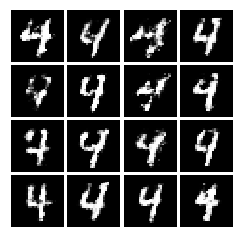

Iteration: 46100 - Discriminator Loss: 0.9672, Generator Loss: 2.014
Iteration: 46200 - Discriminator Loss: 0.96, Generator Loss: 1.826
Iteration: 46300 - Discriminator Loss: 0.8394, Generator Loss: 1.585
Iteration: 46400 - Discriminator Loss: 0.8416, Generator Loss: 1.899
Iteration: 46500 - Discriminator Loss: 1.058, Generator Loss: 1.777
Iteration: 46600 - Discriminator Loss: 0.6124, Generator Loss: 1.859
Iteration: 46700 - Discriminator Loss: 0.7135, Generator Loss: 1.901
Iteration: 46800 - Discriminator Loss: 0.6506, Generator Loss: 2.122
Iteration: 46900 - Discriminator Loss: 0.955, Generator Loss: 1.414
Iteration: 47000 - Discriminator Loss: 1.037, Generator Loss: 2.093
val: 6


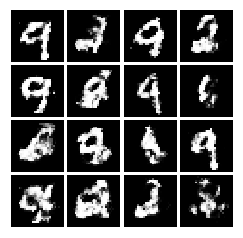

Iteration: 47100 - Discriminator Loss: 0.7384, Generator Loss: 2.112
Iteration: 47200 - Discriminator Loss: 0.7452, Generator Loss: 1.8
Iteration: 47300 - Discriminator Loss: 0.8598, Generator Loss: 2.058
Iteration: 47400 - Discriminator Loss: 0.8251, Generator Loss: 2.045
Iteration: 47500 - Discriminator Loss: 0.9624, Generator Loss: 2.25
Iteration: 47600 - Discriminator Loss: 0.9107, Generator Loss: 2.365
Iteration: 47700 - Discriminator Loss: 0.8585, Generator Loss: 2.034
Iteration: 47800 - Discriminator Loss: 1.174, Generator Loss: 1.905
Iteration: 47900 - Discriminator Loss: 1.002, Generator Loss: 1.857
Iteration: 48000 - Discriminator Loss: 1.105, Generator Loss: 1.642
val: 7


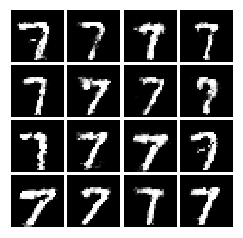

Iteration: 48100 - Discriminator Loss: 0.9392, Generator Loss: 2.278
Iteration: 48200 - Discriminator Loss: 0.8212, Generator Loss: 2.029
Iteration: 48300 - Discriminator Loss: 0.6508, Generator Loss: 2.018
Iteration: 48400 - Discriminator Loss: 0.7803, Generator Loss: 1.965
Iteration: 48500 - Discriminator Loss: 0.74, Generator Loss: 1.767
Iteration: 48600 - Discriminator Loss: 0.8419, Generator Loss: 1.813
Iteration: 48700 - Discriminator Loss: 0.9968, Generator Loss: 2.103
Iteration: 48800 - Discriminator Loss: 0.9451, Generator Loss: 1.938
Iteration: 48900 - Discriminator Loss: 0.681, Generator Loss: 2.102
Iteration: 49000 - Discriminator Loss: 0.5991, Generator Loss: 2.137
val: 9


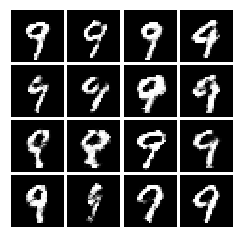

Iteration: 49100 - Discriminator Loss: 0.5807, Generator Loss: 2.183
Iteration: 49200 - Discriminator Loss: 0.9426, Generator Loss: 1.952
Iteration: 49300 - Discriminator Loss: 0.7921, Generator Loss: 2.039
Iteration: 49400 - Discriminator Loss: 0.7791, Generator Loss: 1.964
Iteration: 49500 - Discriminator Loss: 0.7991, Generator Loss: 1.586
Iteration: 49600 - Discriminator Loss: 1.059, Generator Loss: 1.613
Iteration: 49700 - Discriminator Loss: 0.7585, Generator Loss: 2.07
Iteration: 49800 - Discriminator Loss: 1.089, Generator Loss: 1.948
Iteration: 49900 - Discriminator Loss: 0.9325, Generator Loss: 2.061
Iteration: 50000 - Discriminator Loss: 1.062, Generator Loss: 2.16
val: 6


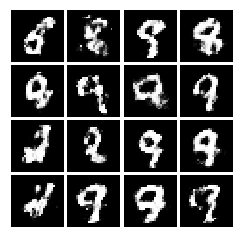

Iteration: 50100 - Discriminator Loss: 0.9076, Generator Loss: 2.201
Iteration: 50200 - Discriminator Loss: 1.09, Generator Loss: 1.901
Iteration: 50300 - Discriminator Loss: 0.725, Generator Loss: 2.191
Iteration: 50400 - Discriminator Loss: 0.5399, Generator Loss: 1.948
Iteration: 50500 - Discriminator Loss: 0.7896, Generator Loss: 1.796
Iteration: 50600 - Discriminator Loss: 0.6319, Generator Loss: 2.277
Iteration: 50700 - Discriminator Loss: 0.8898, Generator Loss: 1.762
Iteration: 50800 - Discriminator Loss: 0.912, Generator Loss: 1.683
Iteration: 50900 - Discriminator Loss: 0.9203, Generator Loss: 1.789
Iteration: 51000 - Discriminator Loss: 0.6012, Generator Loss: 1.994
val: 5


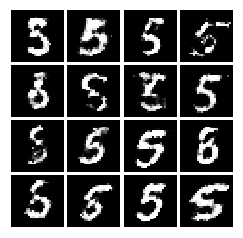

Iteration: 51100 - Discriminator Loss: 0.8492, Generator Loss: 1.7
Iteration: 51200 - Discriminator Loss: 0.8324, Generator Loss: 1.65
Iteration: 51300 - Discriminator Loss: 1.444, Generator Loss: 1.741
Iteration: 51400 - Discriminator Loss: 0.9482, Generator Loss: 1.922
Iteration: 51500 - Discriminator Loss: 1.153, Generator Loss: 2.317
Iteration: 51600 - Discriminator Loss: 1.016, Generator Loss: 2.211
Iteration: 51700 - Discriminator Loss: 0.731, Generator Loss: 2.3
Iteration: 51800 - Discriminator Loss: 0.8805, Generator Loss: 1.75
Iteration: 51900 - Discriminator Loss: 0.753, Generator Loss: 2.251
Iteration: 52000 - Discriminator Loss: 0.7521, Generator Loss: 2.102
val: 0


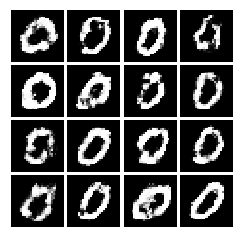

Iteration: 52100 - Discriminator Loss: 0.7718, Generator Loss: 1.725
Iteration: 52200 - Discriminator Loss: 1.059, Generator Loss: 1.391
Iteration: 52300 - Discriminator Loss: 0.806, Generator Loss: 1.845
Iteration: 52400 - Discriminator Loss: 0.8851, Generator Loss: 2.093
Iteration: 52500 - Discriminator Loss: 0.7925, Generator Loss: 1.501
Iteration: 52600 - Discriminator Loss: 0.7952, Generator Loss: 1.779
Iteration: 52700 - Discriminator Loss: 1.108, Generator Loss: 2.037
Iteration: 52800 - Discriminator Loss: 0.8369, Generator Loss: 1.77
Iteration: 52900 - Discriminator Loss: 0.728, Generator Loss: 1.954
Iteration: 53000 - Discriminator Loss: 0.9008, Generator Loss: 2.275
val: 6


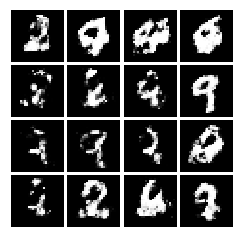

Iteration: 53100 - Discriminator Loss: 1.223, Generator Loss: 1.774
Iteration: 53200 - Discriminator Loss: 0.6033, Generator Loss: 2.535
Iteration: 53300 - Discriminator Loss: 0.7561, Generator Loss: 2.176
Iteration: 53400 - Discriminator Loss: 0.7083, Generator Loss: 1.805
Iteration: 53500 - Discriminator Loss: 0.9301, Generator Loss: 1.845
Iteration: 53600 - Discriminator Loss: 0.9548, Generator Loss: 1.805
Iteration: 53700 - Discriminator Loss: 0.6941, Generator Loss: 1.75
Iteration: 53800 - Discriminator Loss: 0.6646, Generator Loss: 2.277
Iteration: 53900 - Discriminator Loss: 0.9459, Generator Loss: 2.069
Iteration: 54000 - Discriminator Loss: 0.8943, Generator Loss: 1.675
val: 8


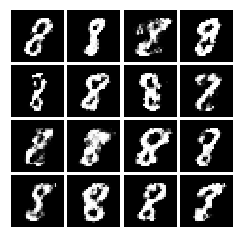

Iteration: 54100 - Discriminator Loss: 0.654, Generator Loss: 1.717
Iteration: 54200 - Discriminator Loss: 1.014, Generator Loss: 1.825
Iteration: 54300 - Discriminator Loss: 1.208, Generator Loss: 2.535
Iteration: 54400 - Discriminator Loss: 0.7262, Generator Loss: 2.429
Iteration: 54500 - Discriminator Loss: 0.6776, Generator Loss: 1.703
Iteration: 54600 - Discriminator Loss: 0.6715, Generator Loss: 1.853
Iteration: 54700 - Discriminator Loss: 0.7909, Generator Loss: 2.164
Iteration: 54800 - Discriminator Loss: 0.9591, Generator Loss: 2.062
Iteration: 54900 - Discriminator Loss: 0.7341, Generator Loss: 2.155
Iteration: 55000 - Discriminator Loss: 0.8049, Generator Loss: 1.675
val: 3


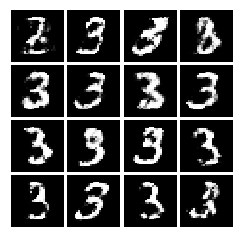

Iteration: 55100 - Discriminator Loss: 0.9233, Generator Loss: 1.604
Iteration: 55200 - Discriminator Loss: 0.7973, Generator Loss: 1.911
Iteration: 55300 - Discriminator Loss: 0.987, Generator Loss: 1.711
Iteration: 55400 - Discriminator Loss: 0.6842, Generator Loss: 2.302
Iteration: 55500 - Discriminator Loss: 1.066, Generator Loss: 2.299
Iteration: 55600 - Discriminator Loss: 0.8342, Generator Loss: 1.878
Iteration: 55700 - Discriminator Loss: 0.7401, Generator Loss: 1.805
Iteration: 55800 - Discriminator Loss: 0.9228, Generator Loss: 1.596
Iteration: 55900 - Discriminator Loss: 0.9151, Generator Loss: 2.118
Iteration: 56000 - Discriminator Loss: 0.7247, Generator Loss: 2.175
val: 2


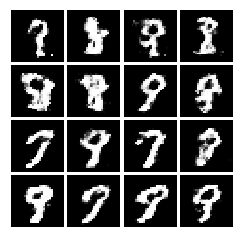

Iteration: 56100 - Discriminator Loss: 0.9183, Generator Loss: 1.885
Iteration: 56200 - Discriminator Loss: 0.8458, Generator Loss: 2.318
Iteration: 56300 - Discriminator Loss: 0.7198, Generator Loss: 1.854
Iteration: 56400 - Discriminator Loss: 0.6478, Generator Loss: 1.966
Iteration: 56500 - Discriminator Loss: 0.8061, Generator Loss: 1.574
Iteration: 56600 - Discriminator Loss: 0.7438, Generator Loss: 1.671
Iteration: 56700 - Discriminator Loss: 0.8138, Generator Loss: 1.849
Iteration: 56800 - Discriminator Loss: 0.6215, Generator Loss: 1.884
Iteration: 56900 - Discriminator Loss: 0.8338, Generator Loss: 1.868
Iteration: 57000 - Discriminator Loss: 0.8245, Generator Loss: 1.976
val: 9


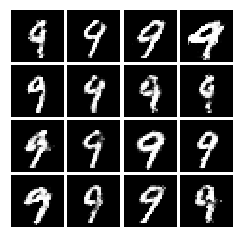

Iteration: 57100 - Discriminator Loss: 0.6973, Generator Loss: 2.106
Iteration: 57200 - Discriminator Loss: 0.8529, Generator Loss: 2.306
Iteration: 57300 - Discriminator Loss: 0.7555, Generator Loss: 2.304
Iteration: 57400 - Discriminator Loss: 1.077, Generator Loss: 2.687
Iteration: 57500 - Discriminator Loss: 1.12, Generator Loss: 1.593
Iteration: 57600 - Discriminator Loss: 0.9372, Generator Loss: 1.872
Iteration: 57700 - Discriminator Loss: 0.8051, Generator Loss: 1.785
Iteration: 57800 - Discriminator Loss: 0.7028, Generator Loss: 1.834
Iteration: 57900 - Discriminator Loss: 0.6145, Generator Loss: 2.266
Iteration: 58000 - Discriminator Loss: 0.8389, Generator Loss: 1.769
val: 7


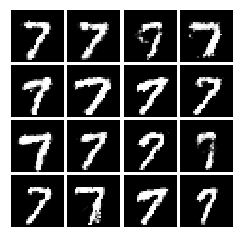

Iteration: 58100 - Discriminator Loss: 0.9555, Generator Loss: 1.651
Iteration: 58200 - Discriminator Loss: 0.9964, Generator Loss: 1.633
Iteration: 58300 - Discriminator Loss: 1.207, Generator Loss: 2.105
Iteration: 58400 - Discriminator Loss: 1.189, Generator Loss: 1.87
Iteration: 58500 - Discriminator Loss: 1.112, Generator Loss: 1.527
Iteration: 58600 - Discriminator Loss: 0.6306, Generator Loss: 2.09
Iteration: 58700 - Discriminator Loss: 0.7428, Generator Loss: 2.132
Iteration: 58800 - Discriminator Loss: 0.6968, Generator Loss: 2.053
Iteration: 58900 - Discriminator Loss: 0.7828, Generator Loss: 1.899
Iteration: 59000 - Discriminator Loss: 0.6099, Generator Loss: 1.919
val: 0


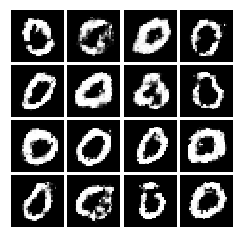

Iteration: 59100 - Discriminator Loss: 1.113, Generator Loss: 1.89
Iteration: 59200 - Discriminator Loss: 0.7247, Generator Loss: 1.871
Iteration: 59300 - Discriminator Loss: 0.7779, Generator Loss: 2.262
Iteration: 59400 - Discriminator Loss: 0.6759, Generator Loss: 2.12
Iteration: 59500 - Discriminator Loss: 0.819, Generator Loss: 1.741
Iteration: 59600 - Discriminator Loss: 0.8431, Generator Loss: 1.899
Iteration: 59700 - Discriminator Loss: 0.9672, Generator Loss: 2.403
Iteration: 59800 - Discriminator Loss: 0.8088, Generator Loss: 1.994
Iteration: 59900 - Discriminator Loss: 0.78, Generator Loss: 2.182
Iteration: 60000 - Discriminator Loss: 1.009, Generator Loss: 2.123
val: 2


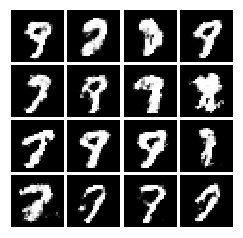

Iteration: 60100 - Discriminator Loss: 0.7679, Generator Loss: 2.102
Iteration: 60200 - Discriminator Loss: 0.846, Generator Loss: 2.019
Iteration: 60300 - Discriminator Loss: 0.9758, Generator Loss: 1.754
Iteration: 60400 - Discriminator Loss: 0.9814, Generator Loss: 1.897
Iteration: 60500 - Discriminator Loss: 0.7974, Generator Loss: 2.082
Iteration: 60600 - Discriminator Loss: 0.8914, Generator Loss: 1.838
Iteration: 60700 - Discriminator Loss: 0.8313, Generator Loss: 2.081
Iteration: 60800 - Discriminator Loss: 0.9378, Generator Loss: 1.78
Iteration: 60900 - Discriminator Loss: 0.8813, Generator Loss: 2.37
Iteration: 61000 - Discriminator Loss: 0.5789, Generator Loss: 2.105
val: 8


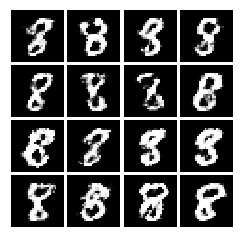

Iteration: 61100 - Discriminator Loss: 1.319, Generator Loss: 2.123
Iteration: 61200 - Discriminator Loss: 0.8999, Generator Loss: 2.289
Iteration: 61300 - Discriminator Loss: 0.9692, Generator Loss: 1.784
Iteration: 61400 - Discriminator Loss: 0.7973, Generator Loss: 2.387
Iteration: 61500 - Discriminator Loss: 1.237, Generator Loss: 2.301
Iteration: 61600 - Discriminator Loss: 0.6008, Generator Loss: 2.382
Iteration: 61700 - Discriminator Loss: 0.8339, Generator Loss: 2.187
Iteration: 61800 - Discriminator Loss: 0.8073, Generator Loss: 2.037
Iteration: 61900 - Discriminator Loss: 0.8048, Generator Loss: 1.72
Iteration: 62000 - Discriminator Loss: 0.9649, Generator Loss: 1.525
val: 7


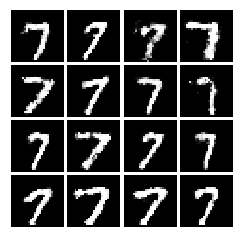

Iteration: 62100 - Discriminator Loss: 0.855, Generator Loss: 1.99
Iteration: 62200 - Discriminator Loss: 0.8084, Generator Loss: 1.767
Iteration: 62300 - Discriminator Loss: 1.118, Generator Loss: 1.908
Iteration: 62400 - Discriminator Loss: 0.6962, Generator Loss: 2.098
Iteration: 62500 - Discriminator Loss: 0.8013, Generator Loss: 1.792
Iteration: 62600 - Discriminator Loss: 1.001, Generator Loss: 1.63
Iteration: 62700 - Discriminator Loss: 1.095, Generator Loss: 2.259
Iteration: 62800 - Discriminator Loss: 0.96, Generator Loss: 1.975
Iteration: 62900 - Discriminator Loss: 0.5449, Generator Loss: 1.954
Iteration: 63000 - Discriminator Loss: 1.19, Generator Loss: 2.182
val: 5


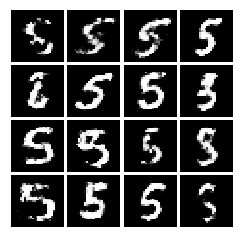

Iteration: 63100 - Discriminator Loss: 0.6618, Generator Loss: 2.164
Iteration: 63200 - Discriminator Loss: 1.111, Generator Loss: 2.336
Iteration: 63300 - Discriminator Loss: 0.8275, Generator Loss: 1.969
Iteration: 63400 - Discriminator Loss: 0.6671, Generator Loss: 1.906
Iteration: 63500 - Discriminator Loss: 0.7481, Generator Loss: 2.15
Iteration: 63600 - Discriminator Loss: 0.9227, Generator Loss: 2.118
Iteration: 63700 - Discriminator Loss: 0.8843, Generator Loss: 2.047
Iteration: 63800 - Discriminator Loss: 0.7393, Generator Loss: 2.082
Iteration: 63900 - Discriminator Loss: 0.7346, Generator Loss: 2.099


KeyboardInterrupt: 

In [14]:
for i in range(100000):
    x_batch, y_batch = mnist.train.next_batch(batch_size)
    z_sample = get_sample_z(size=(batch_size, z_dim))

    _, d_loss_val = sess.run(
        [d_step, d_loss],
        feed_dict={X: x_batch, y: y_batch, z: z_sample}
    )

    _, g_loss_val = sess.run(
        [g_step, g_loss],
        feed_dict={X: x_batch, y: y_batch, z: z_sample}
    )

    if i % 100 == 0:
        print('Iteration: {} - Discriminator Loss: {:.4}, Generator Loss: {:.4}'
              .format(i, d_loss_val, g_loss_val))
        if i % 1000 == 0:
            idx = np.random.randint(0, 10)
            c = np.zeros([16, y_dim])
            c[range(16), idx] = 1

            samples = sess.run(generator_sample, feed_dict={z: get_sample_z(size=(16, z_dim)), y: c})

            print('val: {}'.format(idx))

            fig = plot_images(samples)
            plot.show()
            plot.close(fig)